In [1]:
import intake
col = intake.open_esm_datastore("https://raw.githubusercontent.com/NCAR/cesm-lens-aws/master/intake-catalogs/aws-cesm1-le.json")
col

/srv/conda/envs/notebook/lib/python3.7/site-packages/intake/source/discovery.py:136: FutureWarning: The drivers ['geojson', 'postgis', 'shapefile', 'spatialite'] do not specify entry_points and were only discovered via a package scan. This may break in a future release of intake. The packages should be updated.
  FutureWarning)


,unique
component,5
frequency,5
experiment,6
variable,75
path,365


In [2]:
col.df.frequency.unique()

array(['daily', 'hourly6-1990-2005', 'hourly6-2026-2035',
       'hourly6-2071-2080', 'monthly'], dtype=object)

In [3]:
res = col.search(frequency='hourly6-1990-2005', variable='PRECT')
res.df

,component,frequency,experiment,variable,path
0,atm,hourly6-1990-2005,20C,PRECT,s3://ncar-cesm-lens/atm/hourly6-1990-2005/cesm...


In [4]:
url = res.df.path.values[0]
url

's3://ncar-cesm-lens/atm/hourly6-1990-2005/cesmLE-20C-PRECT.zarr'

In [5]:
import s3fs
import xarray as xr
fs = s3fs.S3FileSystem(anon=True)
ds = xr.open_zarr(fs.get_mapper(url), consolidated=True)
ds

<xarray.Dataset>
Dimensions:       (ilev: 31, lat: 192, lev: 30, lon: 288, member_id: 36, nbnd: 2, slat: 191, slon: 288, time: 23360)
Coordinates:
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * member_id     (member_id) int64 1 2 3 4 5 6 7 8 ... 29 30 31 32 33 34 35 104
  * slat          (slat) float64 -89.53 -88.59 -87.64 ... 87.64 88.59 89.53
  * slon          (slon) float64 -0.625 0.625 1.875 3.125 ... 355.6 356.9 358.1
  * time          (time) object 1990-01-01 06:00:00 ... 2006-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables:
    P0            float64 ...
    PRECT         (member_id, time, lat, lon) float32 dask.array<chunksize=(2, 504, 192, 288), meta=np.ndarray>
    area          (lat, lon) float32 dask.array<chunksize=(192, 288), meta=np.ndarray>
    ch4vmr        (time) float64 dask.array<chunksize=(504,), meta=np.ndarray>
    co2vmr        (time) float64 dask.array<chunksize=(504,), meta=np.ndarray>
    date          (time) int32 dask.array<chunksize=(504,), meta=np.ndarray>
    date_written  (time) |S8 dask.array<chunksize=(504,), meta=np.ndarray>
    datesec       (time) int32 dask.array<chunksize=(504,), meta=np.ndarray>
    f11vmr        (time) float64 dask.array<chunksize=(504,), meta=np.ndarray>
    f12vmr        (time) float64 dask.array<chunksize=(504,), meta=np.ndarray>
    gw            (lat) float64 dask.array<chunksize=(192,), meta=np.ndarray>
    hyai          (ilev) float64 dask.array<chunksize=(31,), meta=np.ndarray>
    hyam          (lev) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    hybi          (ilev) float64 dask.array<chunksize=(31,), meta=np.ndarray>
    hybm          (lev) float64 dask.array<chunksize=(30,), meta=np.ndarray>
    mdt           int32 ...
    n2ovmr        (time) float64 dask.array<chunksize=(504,), meta=np.ndarray>
    nbdate        int32 ...
    nbsec         int32 ...
    ndbase        int32 ...
    ndcur         (time) int32 dask.array<chunksize=(504,), meta=np.ndarray>
    nlon          (lat) int32 dask.array<chunksize=(192,), meta=np.ndarray>
    nsbase        int32 ...
    nscur         (time) int32 dask.array<chunksize=(504,), meta=np.ndarray>
    nsteph        (time) int32 dask.array<chunksize=(504,), meta=np.ndarray>
    ntrk          int32 ...
    ntrm          int32 ...
    ntrn          int32 ...
    sol_tsi       (time) float64 dask.array<chunksize=(504,), meta=np.ndarray>
    time_bnds     (time, nbnd) object dask.array<chunksize=(11680, 2), meta=np.ndarray>
    time_written  (time) |S8 dask.array<chunksize=(504,), meta=np.ndarray>
    w_stag        (slat) float64 dask.array<chunksize=(191,), meta=np.ndarray>
    wnummax       (lat) int32 dask.array<chunksize=(192,), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.0
    NCO:                       4.3.4
    Version:                   $Name$
    history:                   2019-08-01 00:15:18.487461 xarray.open_dataset...
    important_note:            This data is part of the project 'Blind Evalua...
    nco_openmp_thread_number:  1
    revision_Id:               $Id$
    source:                    CAM
    title:                     UNSET

In [22]:
ds.PRECT

,Array,Chunk
Bytes,186.01 GB,222.95 MB
Shape,"(36, 23360, 192, 288)","(2, 504, 192, 288)"
Count,847 Tasks,846 Chunks
Type,float32,numpy.ndarray


In [23]:
ds.PRECT.time

<xarray.DataArray 'time' (time: 23360)>
array([cftime.DatetimeNoLeap(1990-01-01 06:00:00),
       cftime.DatetimeNoLeap(1990-01-01 12:00:00),
       cftime.DatetimeNoLeap(1990-01-01 18:00:00), ...,
       cftime.DatetimeNoLeap(2005-12-31 12:00:00),
       cftime.DatetimeNoLeap(2005-12-31 18:00:00),
       cftime.DatetimeNoLeap(2006-01-01 00:00:00)], dtype=object)
Coordinates:
  * time     (time) object 1990-01-01 06:00:00 ... 2006-01-01 00:00:00
Attributes:
    bounds:     time_bnds
    long_name:  time

In [6]:
import numpy as np
tp_6hr_bins = np.concatenate([[0], np.logspace(-5,  0, 50)])
tp_6hr_bins

array([0.00000000e+00, 1.00000000e-05, 1.26485522e-05, 1.59985872e-05,
       2.02358965e-05, 2.55954792e-05, 3.23745754e-05, 4.09491506e-05,
       5.17947468e-05, 6.55128557e-05, 8.28642773e-05, 1.04811313e-04,
       1.32571137e-04, 1.67683294e-04, 2.12095089e-04, 2.68269580e-04,
       3.39322177e-04, 4.29193426e-04, 5.42867544e-04, 6.86648845e-04,
       8.68511374e-04, 1.09854114e-03, 1.38949549e-03, 1.75751062e-03,
       2.22299648e-03, 2.81176870e-03, 3.55648031e-03, 4.49843267e-03,
       5.68986603e-03, 7.19685673e-03, 9.10298178e-03, 1.15139540e-02,
       1.45634848e-02, 1.84206997e-02, 2.32995181e-02, 2.94705170e-02,
       3.72759372e-02, 4.71486636e-02, 5.96362332e-02, 7.54312006e-02,
       9.54095476e-02, 1.20679264e-01, 1.52641797e-01, 1.93069773e-01,
       2.44205309e-01, 3.08884360e-01, 3.90693994e-01, 4.94171336e-01,
       6.25055193e-01, 7.90604321e-01, 1.00000000e+00])

In [7]:
from xhistogram.xarray import histogram

In [8]:
from dask.distributed import Client

client = Client("tcp://10.32.16.136:33209")
client

Client Scheduler: tcp://10.32.16.136:33209 Dashboard: /user/0000-0001-5999-4917/proxy/8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [16]:
hour = 60*60

# to make calculation bigger, remove .isel(member_id=0); then you get the whole ensemble
precip_in_m = ds.PRECT.isel(member_id=0) * (6 * hour)

In [17]:
tp_hist = histogram(precip_in_m.rename('tp_6hr'), bins=[tp_6hr_bins], dim=['lon']).mean(dim=('time'))
tp_hist.data

dask.array<mean_agg-aggregate, shape=(192, 50), dtype=float64, chunksize=(192, 50), chunktype=numpy.ndarray>

In [18]:
tp_hist_ = tp_hist.compute()

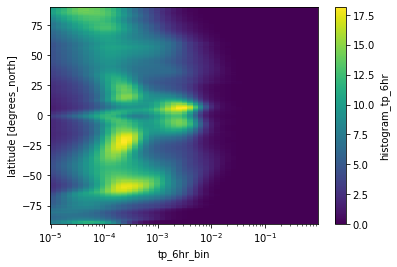

In [19]:
tp_hist_[:,1:].plot(xscale='log')